In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

torch.set_printoptions(linewidth=120)

In [18]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train = True, 
    download = True, 
    transform = transforms.Compose([
        transforms.ToTensor()
    ]))

In [19]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [20]:
print(len(train_set))
print(train_set.classes)
print(train_set.targets)
print(train_set.targets.bincount())

60000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


label : Ankle boot


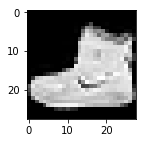

In [21]:
sample = next(iter(train_set))
image, label = sample
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")
print("label :", train_set.classes[label])

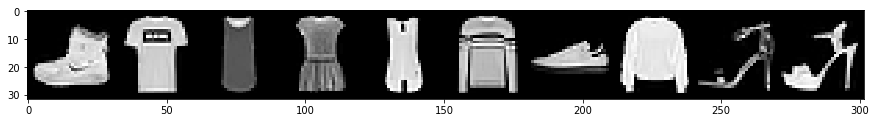

In [22]:
batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))


In [55]:
class CnnNetwork(nn.Module):
    def __init__(self):
        super(CnnNetwork, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels= 1, out_channels = 6, kernel_size=5),
            nn.BatchNorm2d(6),
            nn.ReLU())
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=12 , kernel_size = 5),
            nn.BatchNorm2d(12),
            nn.ReLU())
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return self.out(out)

In [56]:
n = CnnNetwork()
print(n)

CnnNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [57]:
for name, param in n.named_parameters():
    print(name,"\t\t",param.shape)

conv1.0.weight 		 torch.Size([6, 1, 5, 5])
conv1.0.bias 		 torch.Size([6])
conv1.1.weight 		 torch.Size([6])
conv1.1.bias 		 torch.Size([6])
conv2.0.weight 		 torch.Size([12, 6, 5, 5])
conv2.0.bias 		 torch.Size([12])
conv2.1.weight 		 torch.Size([12])
conv2.1.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [58]:
def train(device, epochs):
    model = CnnNetwork().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        for batch_id, (images, labels) in enumerate(train_loader):
            labels, images = labels.to(device), images.to(device)
            
            grid = torchvision.utils.make_grid(images, nrow=10)
            plt.figure(figsize=(15,15))
            plt.imshow(np.transpose(grid,(1,2,0)))


            
            output = model(images)
            loss = criterion(output, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_id % 1000 == 0:
                print('Loss :{:.4f} Epoch[{}/{}]'.format(loss.item(), epoch, Train_epoch))
    return model

torch.Size([10, 12, 20, 20])


RuntimeError: size mismatch, m1: [10 x 4800], m2: [192 x 120] at /Users/soumith/mc3build/conda-bld/pytorch_1549597882250/work/aten/src/TH/generic/THTensorMath.cpp:940

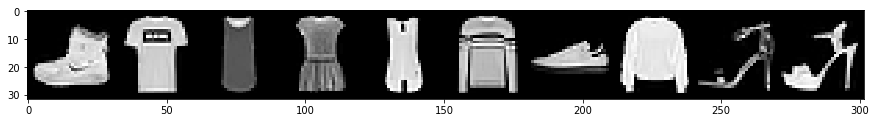

In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 5
train(device,epochs)